# Exercícios de Fixação - Prática

1. Carregue o dataset breast cancer disponível no sklearn e obtenha a distribuição de classes deste dataset.

In [2]:
# Método manual para calcular a distribuição de classes

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

breast = load_breast_cancer()
X = breast.data
y = breast.target

df = pd.DataFrame(X, columns=breast.feature_names)

def classDistribution (classData):

    tam = len(classData)
    labels = np.unique(classData)
    
    classDistr = []
    for class_value in labels:
        cvc = list(filter(lambda x: x == class_value, classData))
        cvc = len(cvc)
        classDistr += [(class_value, cvc/tam)]

    return classDistr

print(classDistribution(y))

[(0, 0.37258347978910367), (1, 0.6274165202108963)]


In [3]:
# Método do DataFrame para calcular a distribuição de classes

from sklearn.datasets import load_breast_cancer
import pandas as pd

bc = load_breast_cancer(as_frame=True)
df = pd.DataFrame(bc['data'])
df['target'] = bc['target']

dist = df['target'].value_counts(normalize=True)

print(f"Classe 0: {dist[0]*100 : .2f} %")
print(f"Classe 1: {dist[1]*100 : .2f} %")

Classe 0:  37.26 %
Classe 1:  62.74 %


2. Compare as métricas accuracy e f1 em bases de dados binárias indicando as suas vantagens em relação a outra. Use o classificador Vizinho Mais Próximo e uma divisão percentual com 30% dos exemplos do dataset breast cancer usados para teste para obter o valor da acurácia e f1 deste classificador neste dataset. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, 
                    y, test_size=0.3, random_state=0)

oneNN = KNeighborsClassifier(n_neighbors=1)

oneNN.fit(X_train, y_train) 
print(y_test)
y_pred = oneNN.predict(X_test)
print(y_pred)
print('\n')

print("accuracy score: %.2f\n" % accuracy_score(y_pred, y_test))

print("fmeasure score")
print("macro: %.2f" % f1_score(y_pred, y_test, average='macro'))
print("micro: %.2f" % f1_score(y_pred, y_test, average='micro'))
print("weighted: %.2f\n" % f1_score(y_pred, y_test, average='weighted'))

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1]


accuracy score: 0.92

fmeasure score
macro: 0.91
micro: 0.92
weighted: 0.92



In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        63
           1       0.93      0.94      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



3. Use o classificador Vizinho Mais Próximo e uma validação cruzada estratificada com 10 folds no dataset breast cancer para obter a matriz de confusão, a acurácia, o desvio padrão, o intervalo de confiança a 95%, a f1 macro, a precision micro e o recall micro deste classificador neste dataset.


Mean Accuracy: 0.92 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.90, 0.93)

Mean Micro Precision: 0.92 Standard Deviation: 0.03
Micro Precision Confidence Interval (95%): (0.90, 0.93)

Mean Micro Recall: 0.92 Standard Deviation: 0.03
Micro Recall Confidence Interval (95%): (0.90, 0.93)

Mean Macro F1: 0.91 Standard Deviation: 0.03
Macro F1 Confidence Interval (95%): (0.89, 0.93)



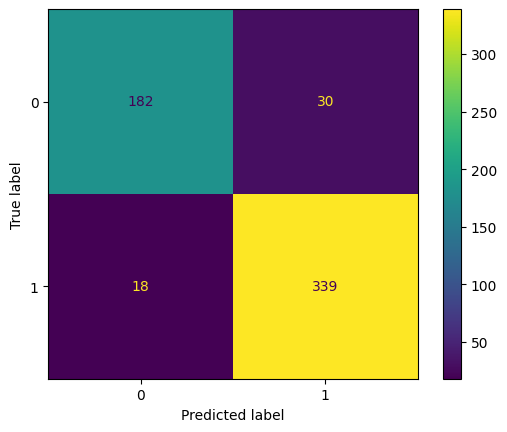

In [6]:
from sklearn.model_selection import cross_validate, cross_val_predict
from scipy import stats
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = cross_val_predict(oneNN,X,y,cv=10)
conf_mat = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(conf_mat).plot()

scorings = ['accuracy', 'precision_micro', 'recall_micro', 'f1_macro']
scores = cross_validate(oneNN,X,y, scoring=scorings, cv=10)

scores_acc = scores['test_accuracy']
mean = scores_acc.mean()
std = scores_acc.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_acc)))
print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_prec = scores['test_precision_micro']
mean = scores_prec.mean()
std = scores_prec.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_prec)))
print("Mean Micro Precision: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Micro Precision Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_rec = scores['test_recall_micro']
mean = scores_rec.mean()
std = scores_rec.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_rec)))
print("Mean Micro Recall: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Micro Recall Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

scores_f1 = scores['test_f1_macro']
mean = scores_f1.mean()
std = scores_f1.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores_f1)))
print("Mean Macro F1: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Macro F1 Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))


In [7]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       212
           1       0.92      0.95      0.93       357

    accuracy                           0.92       569
   macro avg       0.91      0.90      0.91       569
weighted avg       0.92      0.92      0.92       569



4. Use o classificador K Vizinhos Mais Próximos com o método indicado (use 10 partições) no dataset breast cancer para realizar a busca pelo melhor valor de K. Apresente a melhor acurácia obtida, o desvio padrão,o intervalo de confiança a 95% e o valor de K correspondente. 

In [8]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':list(range(1,10))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,cv=10)
clf.fit(X,y)

print(f"Best params is: {clf.best_params_}")
print("The performance with that param was %0.2f%%" % (clf.best_score_ * 100))

best = clf.best_params_['n_neighbors'] - 1

scores = np.array ([clf.cv_results_[f'split{i}_test_score'][best] for i in range(10)])

# scores = np.array ([clf.cv_results_['split0_test_score'][best], 
#                       clf.cv_results_['split1_test_score'][best], 
#                       clf.cv_results_['split2_test_score'][best], 
#                       clf.cv_results_['split3_test_score'][best], 
#                       clf.cv_results_['split4_test_score'][best], 
#                       clf.cv_results_['split5_test_score'][best], 
#                       clf.cv_results_['split6_test_score'][best], 
#                       clf.cv_results_['split7_test_score'][best], 
#                       clf.cv_results_['split8_test_score'][best], 
#                       clf.cv_results_['split9_test_score'][best]])


mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print ("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % (inf, sup)) 

Best params is: {'n_neighbors': 8}
The performance with that param was 92.98%

Mean Accuracy: 0.93 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.91, 0.95)



5. Use o classificador K Vizinhos Mais Próximos com o método indicado no dataset breast cancer para realizar a busca pelo melhor valor de K sem possibilidade de superajuste. Apresente a melhor acurácia obtida, o desvio padrão e o intervalo de confiança a 95%.

In [9]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

parameters = {'n_neighbors': list(range(1,10))}

knn = KNeighborsClassifier()

clf = GridSearchCV(estimator=knn, param_grid = parameters, 
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

scores = cross_val_score(clf, X, y, scoring='accuracy', 
                         cv = rkf)

print(scores)

mean = scores.mean()
std = scores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(scores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup))

[0.85964912 0.89473684 0.9122807  0.96491228 0.9122807  0.92982456
 0.94736842 0.98245614 0.96491228 0.94642857 0.87719298 0.89473684
 0.87719298 0.96491228 0.94736842 0.98245614 0.9122807  0.94736842
 0.92982456 0.96428571 0.92982456 0.92982456 0.89473684 0.98245614
 0.92982456 0.9122807  0.89473684 0.94736842 0.89473684 0.92857143]

Mean Accuracy: 0.93 Standard Deviation: 0.03
Accuracy Confidence Interval (95%): (0.92, 0.94)



6. Repita o procedimento proposto no exercício 9 somente trocando o classificador para uma Árvore de Decisão. Compare o desempenho obtido pelo K Vizinhos Mais Próximos com a Árvore de Decisão utilizando o teste T e o de Wilcoxon. Compare os dois resultados e indique em qual dos testes é mais fácil mostrar a diferença entre os métodos.

In [10]:
from sklearn.tree import DecisionTreeClassifier

dT = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3], 'min_samples_split': [2, 4]}

clf = GridSearchCV(estimator=dT, param_grid = parameters, 
                  scoring='accuracy', cv = 4)

rkf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
dtscores = cross_val_score(clf, X, y, scoring='accuracy', 
                         cv = rkf)

print(dtscores)

mean = dtscores.mean()
std = dtscores.std()
inf, sup = stats.norm.interval(0.95, loc=mean, 
                               scale=std/np.sqrt(len(dtscores)))

print("\nMean Accuracy: %0.2f Standard Deviation: %0.2f" % (mean, std))
print("Accuracy Confidence Interval (95%%): (%0.2f, %0.2f)\n" % 
       (inf, sup)) 

[0.85964912 0.87719298 0.92982456 0.94736842 0.98245614 0.96491228
 0.87719298 0.98245614 0.9122807  0.92857143 0.9122807  0.92982456
 0.9122807  0.92982456 0.9122807  0.84210526 0.96491228 0.94736842
 1.         0.91071429 0.94736842 0.92982456 0.9122807  0.94736842
 0.92982456 0.94736842 0.96491228 0.92982456 0.96491228 0.91071429]

Mean Accuracy: 0.93 Standard Deviation: 0.04
Accuracy Confidence Interval (95%): (0.92, 0.94)



In [14]:
# Python implementation of the Nadeau and Bengio correction of dependent Student's t-test
# using the equation stated in https://www.cs.waikato.ac.nz/~eibe/pubs/bouckaert_and_frank.pdf

from scipy.stats import t
from math import sqrt
from statistics import stdev

def corrected_dependent_ttest(data1, data2, n_training_samples, n_test_samples, alpha):
    n = len(data1)
    differences = [(data1[i]-data2[i]) for i in range(n)]
    sd = stdev(differences)
    divisor = 1 / n * sum(differences)
    test_training_ratio = n_test_samples / n_training_samples
    denominator = sqrt(1 / n + test_training_ratio) * sd
    t_stat = divisor / denominator
    # degrees of freedom
    df = n - 1
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [18]:
from scipy.stats import wilcoxon

print('Corrected T Test')
s,p,cv, p = corrected_dependent_ttest(scores, dtscores, len(X_train), len(X_test), 0.05)
print("t: %0.2f p-value: %0.2f\n" % (s,p))


print ('Wilcoxon Test')
s,p = wilcoxon(scores,dtscores, method='approx') # é necessário definir o método para evitar um warning
print("w: %0.2f p-value: %0.2f\n" % (s,p))

Corrected T Test
t: -0.05 p-value: 0.96

Wilcoxon Test
w: 148.00 p-value: 0.69

